## Part 0

In [114]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head(5)



,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


# Part 1

## Problem 1

In [115]:
import sqlite3
import pandas as pd
import numpy as np


sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

query1 = 'SELECT t.yearID as yearID,t.teamID as teamID,W as wins,G as games, SUM(s.salary) as payroll, CAST(W as FLOAT)/CAST(G as FLOAT) * 100 as win_rate FROM Salaries s, Teams t WHERE t.teamID = s.teamID AND t.yearID = s.yearID GROUP BY s.yearID,s.teamID'
payroll_vs_win = pandas.read_sql(query1,conn).fillna(0)

payroll_vs_win.head(50)


,yearID,teamID,wins,games,payroll,win_rate
0,1985,ATL,66,162,14807000.0,40.740741
1,1985,BAL,83,161,11560712.0,51.552795
2,1985,BOS,81,163,10897560.0,49.693252
3,1985,CAL,90,162,14427894.0,55.555556
4,1985,CHA,85,163,9846178.0,52.147239
5,1985,CHN,77,162,12702917.0,47.530864
6,1985,CIN,89,162,8359917.0,54.938272
7,1985,CLE,60,162,6551666.0,37.037037
8,1985,DET,84,161,10348143.0,52.173913
9,1985,HOU,83,162,9993051.0,51.234568


I delt with missing data by both merging my data using inner join, and replacing all missing data after the join with 0.

# Part 2

## Problem 2

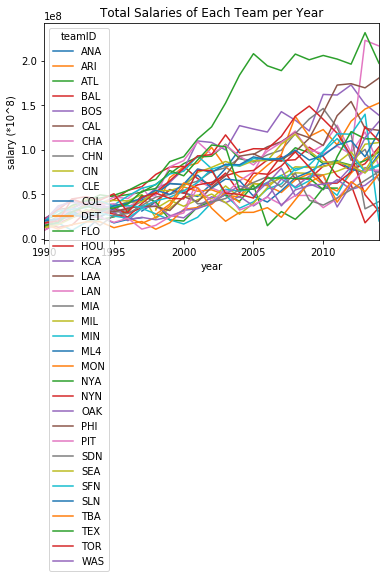

In [116]:
import matplotlib.pyplot as plt
import math

after_1990_payroll = payroll_vs_win["yearID"] >= 1990
payroll_plot_db = payroll_vs_win[after_1990_payroll]

payroll_plot_db = payroll_plot_db.groupby(['teamID','yearID'])['payroll'].mean()
payroll_plot_db = payroll_plot_db.unstack(level = 0)
plt1 = payroll_plot_db.plot(title = "Total Salaries of Each Team per Year")
plt1.set_xlabel("year")
plt1.set_ylabel("salary (*10^8)")
plt1


I first isolated the years by remove all years before 1990. Then I plotted each team's salaries by year as a line graph.

## Question 1
One generalization that could be made is that as the years progress, most teams tend to spend more on payroll. Also, in the 1990's, most teams had a generally similar payroll. But as time went on, the gap between the highest and lowest paying teams tended to grow.

## Problem 3

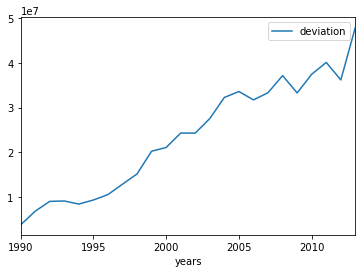

In [117]:
year = 1990
std_years = []
stds = []
after_1990_payroll = payroll_vs_win["yearID"] >= 1990
payroll_plot_db = payroll_vs_win[after_1990_payroll]
#np.std(stds)
year_sum = []
for row in payroll_plot_db.iterrows():
    if row[1][0] != year:
        year = year + 1
        std_years.append(row[1][0] - 1)
        stds.append(np.std(year_sum))
        year_sum = []
    year_sum.append(row[1][4])

df = pd.DataFrame(data = {'years': std_years, 'deviation': stds})
df.plot(x = 'years', y = 'deviation')


In this graph, I ploted the standard deviation between total salaries of each team from 1990 to 2014. I got the standard deviation by finding the standard deviation of the salaries of every team each year.
Here, we can see that the standard deviation increased from 1990 to 2014, meaning there was a growing discrepency in the salary being paid by each team.

## Problem 4

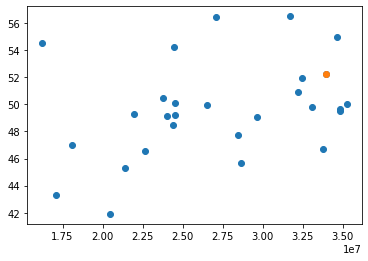

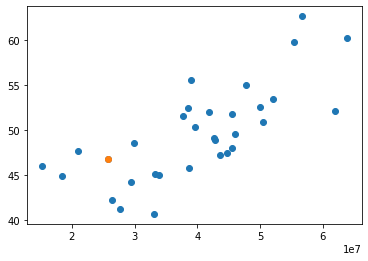

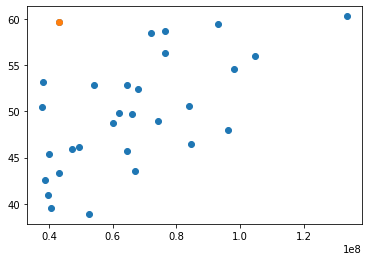

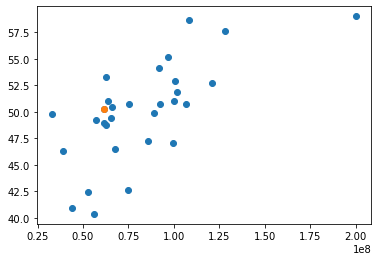

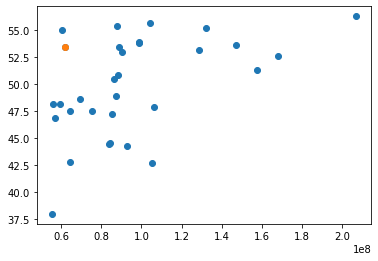

In [118]:
charts_db = []
for x in range (0,5):
    temp = payroll_plot_db.copy()
    cut1 = pd.cut(temp['yearID'],5,labels = ['first','second','third','forth','fifth'])
    temp2 = pd.DataFrame(data = {'teamID': list(temp['teamID'].groupby(cut1))[x][1],'win_rate': list(temp['win_rate'].groupby(cut1))[x][1], 'payroll': list(temp['payroll'].groupby(cut1))[x][1]})
    charts_db.append(temp2)
    

for ch in charts_db:
    team_win = {}
    team_spend = {}
    team_count = {}
    new_title = 'group ' + str(iter)
    for iter in ch.iterrows():
        if iter[1][0] in team_win.keys():
            team_win[iter[1][0]] = team_win[iter[1][0]] + iter[1][1]
            team_spend[iter[1][0]] = team_spend[iter[1][0]] + iter[1][2]
            team_count[iter[1][0]] = team_count[iter[1][0]] + 1
        else:
            team_win[iter[1][0]] = iter[1][1]
            team_spend[iter[1][0]] = iter[1][2]
            team_count[iter[1][0]] = 1
    teams = []
    avg_team_wins = []
    avg_team_spending = []
            
    for keys in team_win.keys():
        avg_win = team_win[keys]/team_count[keys]
        avg_spending = team_spend[keys]/team_count[keys]
        teams.append(keys)
        avg_team_wins.append(avg_win)
        avg_team_spending.append(avg_spending)
   
    plt.scatter(x = avg_team_spending, y = avg_team_wins)
    oakindex = teams.index('OAK')
    okland_money = []
    okland_money.append(avg_team_spending[oakindex])
    okland_wins = []
    okland_wins.append(avg_team_wins[oakindex]) 
    plt.scatter(x = okland_money, y = okland_wins)
    plt.show()


First, I divided the years of 1990-2014 by five. Then, I found the mean spending and mean win perent of each team in each time period. Then, I plotted every team in blue, then replotted Oakland in orange.

## Question 2
Over these five groups, we can once again see that the payroll has increased, and that the teams that spend more tend to have better win rates that their lesser-spending counterparts. This may also be because there is no hard salary cap in baseball, and the richest teams can spend essentially all the money they want, helping them get the best players. We can also see that as time passes, teams have to spend more in order to achive similar win-rates, as win-rates tend to cap out at around 65-75% wins. This may be because the average spending of most teams catches up with the best teams, so they have to spend more to compete with them.

The Oakland A's, shown in orange, in group 1 had a lot of wins compared to the other teams, but also spent a lot. In group 2, they had less wins than average, but also spend less. However, in group three, which is arround when they started playing moneyball, their average wins compared to their spending were a lot higher than moster teams, as they were much farther in the upper-left-hand corner than most teams.

# Part 3

## Problem 5

In [119]:
avg_payroll= payroll_plot_db.groupby(['yearID']).mean()['payroll']
avg_payroll_std= payroll_plot_db.groupby(['yearID']).std()['payroll']

avg_payroll_by_year = {}
avg_payroll_std_by_year = {}
for index, value in avg_payroll.items():
    avg_payroll_by_year[index] = value
for index, value in avg_payroll_std.items():
    avg_payroll_std_by_year[index] = value


std_pay = []

for row in payroll_plot_db.iterrows():
    yr = row[1][0]
    standardized_pay = (row[1][4] - avg_payroll_by_year[yr])/avg_payroll_std_by_year[yr]
    std_pay.append(standardized_pay)


temp = payroll_plot_db.copy()
temp['standardized_payroll'] = std_pay
payroll_plot_db = temp
payroll_plot_db
    

,yearID,teamID,wins,games,payroll,win_rate,standardized_payroll
130,1990,ATL,65,162,14555501.0,40.123457,-0.667275
131,1990,BAL,76,161,9680084.0,47.204969,-1.959861
132,1990,BOS,88,162,20558333.0,54.320988,0.924213
133,1990,CAL,80,162,21720000.0,49.382716,1.232198
134,1990,CHA,94,162,9491500.0,58.024691,-2.009859
135,1990,CHN,77,162,13624000.0,47.530864,-0.914238
136,1990,CIN,91,162,14370000.0,56.172840,-0.716456
137,1990,CLE,77,162,14487000.0,47.530864,-0.685437
138,1990,DET,79,162,17593238.0,48.765432,0.138098
139,1990,HOU,75,162,18330000.0,46.296296,0.333431


First, I found the avg mean payroll and std of the payroll of each year. Then I applied the standardized payroll equation to each team in each year, and added it to a column.

## Problem 6

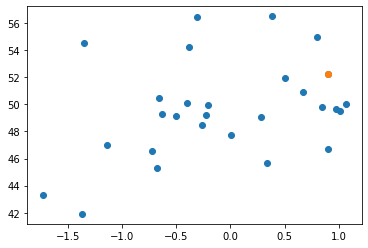

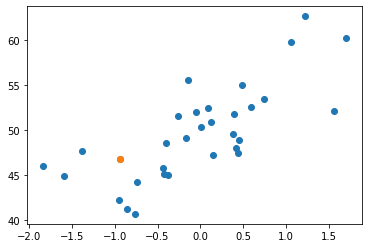

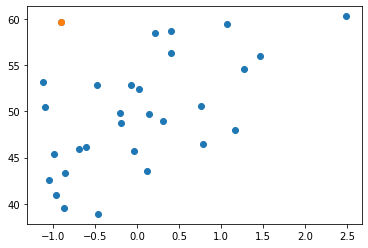

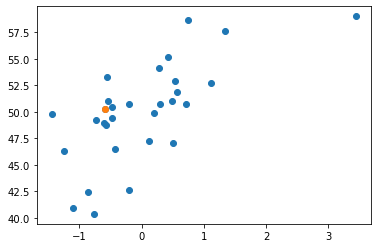

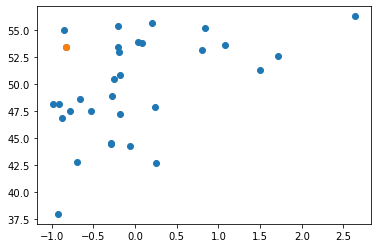

In [120]:
charts_db = []
for x in range (0,5):
    temp = payroll_plot_db.copy()
    cut1 = pd.cut(temp['yearID'],5,labels = ['first','second','third','forth','fifth'])
    temp2 = pd.DataFrame(data = {'teamID': list(temp['teamID'].groupby(cut1))[x][1],'win_rate': list(temp['win_rate'].groupby(cut1))[x][1], 'standardized_payroll': list(temp['standardized_payroll'].groupby(cut1))[x][1]})
    charts_db.append(temp2)
    

for ch in charts_db:
    team_win = {}
    team_spend = {}
    team_count = {}
    new_title = 'group ' + str(iter)
    for iter in ch.iterrows():
        if iter[1][0] in team_win.keys():
            team_win[iter[1][0]] = team_win[iter[1][0]] + iter[1][1]
            team_spend[iter[1][0]] = team_spend[iter[1][0]] + iter[1][2]
            team_count[iter[1][0]] = team_count[iter[1][0]] + 1
        else:
            team_win[iter[1][0]] = iter[1][1]
            team_spend[iter[1][0]] = iter[1][2]
            team_count[iter[1][0]] = 1
    teams = []
    avg_team_wins = []
    avg_team_spending = []
            
    for keys in team_win.keys():
        avg_win = team_win[keys]/team_count[keys]
        avg_spending = team_spend[keys]/team_count[keys]
        teams.append(keys)
        avg_team_wins.append(avg_win)
        avg_team_spending.append(avg_spending)
   
    plt.scatter(x = avg_team_spending, y = avg_team_wins)
    oakindex = teams.index('OAK')
    okland_money = []
    okland_money.append(avg_team_spending[oakindex])
    okland_wins = []
    okland_wins.append(avg_team_wins[oakindex]) 
    plt.scatter(x = okland_money, y = okland_wins)
    plt.show()


## Question 3
The graphs in both part 4 and part 6 are relatively simmilar. This show that the teams that have a lower standardized_payroll, ie teams that spend less than the league average, tend to win less games, and that oakland, with usually the lowers standardized_payroll yet high ammount of wins, still tends to be the most efficient team. 

## Problem 7

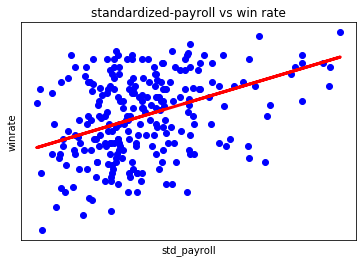

In [121]:
from sklearn import datasets, linear_model
df = payroll_plot_db.copy()
Y = df['win_rate'].values
X = df['standardized_payroll'].values


X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]

# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]

# Plot outputs
plt.scatter(X_test, Y_test,  color='blue')
plt.title('standardized-payroll vs win rate')
plt.xlabel('std_payroll')
plt.ylabel('winrate')
plt.xticks(())
plt.yticks(())


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

plt.show()


First, I plotted the std_payroll against the winrate, then used a line of best fit to find the trend.

## Problem 8

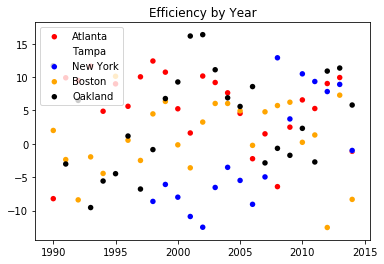

In [122]:
df = payroll_plot_db.copy()
expected_win_pct = []
for row in df.iterrows():
    expected_win_pct.append(50 + (2.5 * row[1][6]))
df['expected_win_pct'] = expected_win_pct

efficiency = []
for row in df.iterrows():
    efficiency.append(row[1][5] - row[1][7])
df['efficiency'] = efficiency

X_ATL = []
Y_ATL = []
for row in df.iterrows():
    if row[1][1] == 'ATL':
        X_ATL.append(row[1][0])
        Y_ATL.append(row[1][8])
ATL_DATA = (X_ATL, Y_ATL)
X_TBA = []
Y_TBA = []
for row in df.iterrows():
    if row[1][1] == 'TBA':
        X_TBA.append(row[1][0])
        Y_TBA.append(row[1][8])  
TBA_DATA = (X_TBA, Y_TBA)
X_NYA = []
Y_NYA = []
for row in df.iterrows():
    if row[1][1] == 'NYA':
        X_NYA.append(row[1][0])
        Y_NYA.append(row[1][8])
NYA_DATA = (X_TBA, Y_TBA)
X_BOS = []
Y_BOS = []
for row in df.iterrows():
    if row[1][1] == 'BOS':
        X_BOS.append(row[1][0])
        Y_BOS.append(row[1][8])
BOS_DATA = (X_BOS, Y_BOS)
X_OAK = []
Y_OAK = []
for row in df.iterrows():
    if row[1][1] == 'OAK':
        X_OAK.append(row[1][0])
        Y_OAK.append(row[1][8])
OAK_DATA = (X_OAK, Y_OAK)
data = (ATL_DATA, TBA_DATA, NYA_DATA, BOS_DATA, OAK_DATA)
colors = ("red", "white", "blue", "orange", "black")
groups = ("Atlanta", "Tampa", "New York", "Boston", "Oakland")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, c=color, edgecolors = 'none', s = 30, label = group)

plt.legend(loc=2)
plt.title('Efficiency by Year')
plt.show()



First, I found the expected win percent with the line of best fit equation of the standardized payroll, then I found the efficiency of each team using the win percent and expected win percent. Next, I created two arrays for each team I was plotting, one for the year, and the other for the efficiency. I then plotted each on a chart and color-coded them.

## Question 4
As we can see from the chart above, Oakland, compared to other teams, are more efficient with their money as time goes on, as their efficiency tends to be higher than the other teams in this sample group. This means that each dollar they spend contributes more to wins than most other teams.